# Stock Predictor

This project uses 30 years worth of data on the SP500 to predict whether the price will go up or down.

## Data Import and Feature Generation

In [2]:
import pandas as pd
import yfinance as yf # used to get daily stock and index prices from yahoo finance

In [3]:
sp500=yf.Ticker("^GSPC") # ticker class let's you download price history for a single symbol

In [4]:
sp500 = sp500.history(period="max") # history method querries prices for a given range

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,0.0,0.0
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,0.0,0.0
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000,0.0,0.0


Returns a pd df where each row is price on trading days, with:
Open, Close - price at day opening/closing
High, Low - highest and lowest prices
Volume - total shares traded
Will not use dividends and stock splits

In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-11-27 00:00:00-05:00', '2023-11-28 00:00:00-05:00',
               '2023-11-29 00:00:00-05:00', '2023-11-30 00:00:00-05:00',
               '2023-12-01 00:00:00-05:00', '2023-12-04 00:00:00-05:00',
               '2023-12-05 00:00:00-05:00', '2023-12-06 00:00:00-05:00',
               '2023-12-07 00:00:00-05:00', '2023-12-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24101, freq=None)

<Axes: xlabel='Date'>

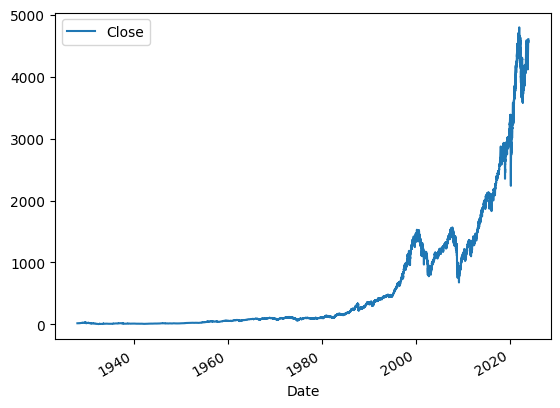

In [8]:
sp500.plot.line(y="Close", use_index=True)

Should have bought early!

In [9]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [10]:
#useful to know whether SP500 will go up or down to know when to buy/sell

sp500["Tomorrow"] = sp500["Close"].shift(-1) # shifting closing price as estimate for tomorrow

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,4549.339844
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000,4585.589844


In [12]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # new col to check if price goes up or down as int bool
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176,0
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,4549.339844,0
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000,4585.589844,1


In [21]:
relevant_sp500 = sp500.loc["1990-01-01 00:00:00-05:00":].copy() # only including last 30 years of data for relevancy

In [22]:
relevant_sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176,0
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,4549.339844,0
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000,4585.589844,1


## Machine Learning

Building a model (random forest)

In [24]:
from sklearn.ensemble import RandomForestClassifier # using to avoid overfitting and pick up non-linear trends

In [25]:
# set model as RF with 100 decision trees
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)

In [26]:
# as time-series data, cannot do k-fold cross-validation so just split sequentially
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]


# choose features
predictors = ["Close", "Volume", "Open", "High", "Low"]

# train model on features and the target output
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=42)

In [27]:
# generate predictions using model
preds = model.predict(test[predictors])

In [34]:
# convert predictions in series data type
preds = pd.Series(preds, index=test.index, name="Predictions")
preds

Date
2023-07-20 00:00:00-04:00    1
2023-07-21 00:00:00-04:00    1
2023-07-24 00:00:00-04:00    1
2023-07-25 00:00:00-04:00    1
2023-07-26 00:00:00-04:00    1
                            ..
2023-12-04 00:00:00-05:00    1
2023-12-05 00:00:00-05:00    1
2023-12-06 00:00:00-05:00    1
2023-12-07 00:00:00-05:00    1
2023-12-08 00:00:00-05:00    1
Name: Predictions, Length: 100, dtype: int32

In [30]:
from sklearn.metrics import precision_score

In [31]:
#check precision of predicted vs actual target value
precision_score(test["Target"], preds)

0.5135135135135135

In [35]:
combined = pd.concat([test["Target"], preds], axis=1) # add results onto pd df

<Axes: xlabel='Date'>

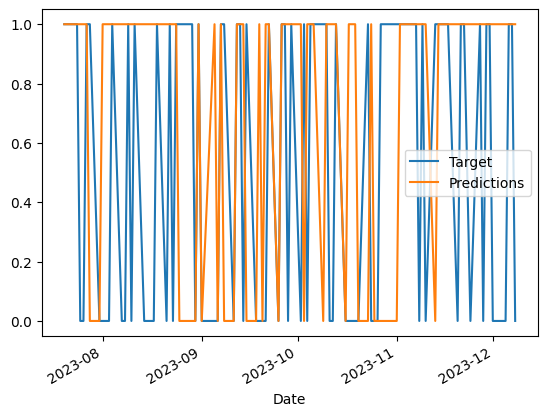

In [36]:
combined.plot()

## Backtesting

In [37]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"]) # train the model on training data
    preds = model.predict(test[predictors]) # generate predictions
    preds = pd.Series(preds, index=test.index, name="Predictions") # convert to pd series datatype
    combnied = pd.concat([test["Target"], preds], axis=1) # make a df with predictions and actual values of target
    return combined
    

In [38]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [39]:
predictions = backtest(sp500, model, predictors)

In [40]:
predictions["Predictions"].value_counts()

Predictions
1    6438
0    2262
Name: count, dtype: int64

In [41]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5135135135135135

In [42]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.52
0    0.48
Name: count, dtype: float64